In [1]:
import sys, os
module_path = os.path.abspath(os.path.join('..'))

if module_path not in sys.path:
    sys.path.append(module_path)

# move directory
os.chdir("..")

In [2]:
import pandas as pd

df_disrupt = pd.read_csv("./dataset/Bayesian_Disruption_Shot_List.csv")

In [3]:
df_disrupt_2022 = df_disrupt[df_disrupt.Year == 2022]

In [4]:
df_disrupt_2022['shot'] = df_disrupt_2022['shot'].astype(int)
shot_list = df_disrupt_2022.shot.unique()

<ipython-input-4-9feb2c8798f2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_disrupt_2022['shot'] = df_disrupt_2022['shot'].astype(int)


In [5]:
df_efit = pd.read_csv("./dataset/KSTAR_Disruption_ts_data_efit.csv")

In [6]:
analysis = {}
analysis['q95'] = []
analysis['betan'] = []
analysis['li'] = []
analysis['year'] = []
analysis['shot'] = []

for year in df_disrupt.Year.unique():
    shot_list = df_disrupt[df_disrupt.Year == year].shot.unique()
    
    for shot in shot_list:
        
        if shot not in df_efit.shot.unique():
            continue
        
        df_shot = df_efit[df_efit.shot == int(shot)]
        
        analysis['betan'].extend(df_shot['\\betan'].values.tolist())
        analysis['q95'].extend(df_shot['\\q95'].values.tolist())
        analysis['li'].extend(df_shot['\\li'].values.tolist())
        analysis['shot'].extend(df_shot['shot'].values.tolist())
        analysis['year'].extend([int(year) for _ in range(len(df_shot))])

analysis = pd.DataFrame(analysis)

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

(0.0, 5.0)

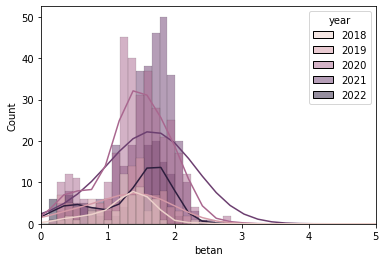

In [8]:
sns.histplot(data = analysis.groupby(['shot', 'year']).mean(), x = 'betan', hue = 'year', kde = True)
plt.xlim([0, 5])

(0.0, 10.0)

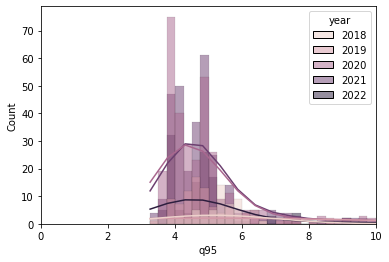

In [9]:
sns.histplot(data = analysis.groupby(['shot', 'year']).mean(), x = 'q95', hue = 'year', kde = True)
plt.xlim([0, 10])

(0.0, 10.0)

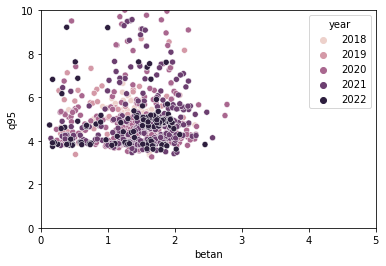

In [10]:
sns.scatterplot(x = 'betan', y = 'q95', data = analysis.groupby(['shot', 'year']).mean(), hue = 'year')
plt.xlim([0, 5])
plt.ylim([0, 10])

<ipython-input-11-a5d1be306820>:10: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig) # Method 1


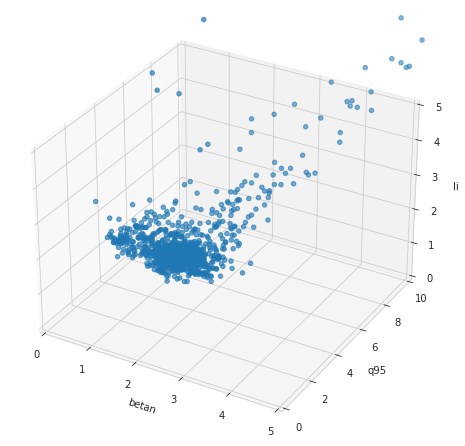

In [11]:
import re, seaborn as sns, numpy as np, pandas as pd, random
from pylab import *
from matplotlib.pyplot import plot, show, draw, figure, cm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
sns.set_style("whitegrid", {'axes.grid' : False})

fig = plt.figure(figsize=(6,6))

ax = Axes3D(fig) # Method 1
data = analysis.groupby(['shot', 'year']).mean()

x = data['betan']
y = data['q95']
z = data['li']

ax.scatter(x, y, z, marker='o')
ax.set_xlabel('betan')
ax.set_ylabel('q95')
ax.set_zlabel('li')

ax.set_xlim([0, 5])
ax.set_ylim([0, 10])
ax.set_zlim([0, 5])

plt.show()

In [12]:
df_disrupt[df_disrupt.Year.isin([2021,2022])].tail()

,shot,Year,t_flattop_start,t_ip_min_fault,t_tmq_ECE,t_tmq_dmf,t_tmq,t_warning,3D,Ipform,DB,flag,flag2,tmp,temp_col,type,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19
957,31959.0,2022.0,1.250,5.425,5.408,5.407,5.407,NaN,0.0,0.0,0.0,1.0,1.0,1.0,600.0,NaN,NaN,NaN,NaN,NaN
958,31961.0,2022.0,1.200,7.002,6.988,6.929,6.988,NaN,0.0,0.0,0.0,1.0,1.0,1.0,600.0,NaN,NaN,NaN,NaN,NaN
959,31964.0,2022.0,1.200,5.562,5.549,5.459,5.549,NaN,0.0,0.0,0.0,1.0,1.0,1.0,600.0,NaN,NaN,NaN,NaN,NaN
960,31969.0,2022.0,1.409,5.573,5.560,5.552,5.560,NaN,0.0,0.0,0.0,1.0,1.0,1.0,500.0,NaN,NaN,NaN,NaN,NaN
961,31982.0,2022.0,1.409,7.090,7.077,7.080,7.080,NaN,0.0,0.0,0.0,1.0,0.0,0.0,500.0,NaN,NaN,NaN,NaN,NaN


In [13]:
len(df_disrupt[df_disrupt.Year.isin([2021,2022])])

459

In [14]:
len(df_disrupt[df_disrupt.Year.isin([2018,2019,2020])])

503

In [25]:
df_efit = pd.read_pickle("./dataset/Bayesian_Disruption_efit.pkl")

In [83]:
cols_efit = ['\\q95', '\\qmin', '\\ipmhd', '\\kappa', '\\tritop','\\tribot', '\\betap', '\\betan', '\\li', '\\bcentr', '\\rsurf', '\\aminor','\\drsep', '\\rxpt1', '\\zxpt1', '\\rxpt2', '\\zxpt2']
t_warning = 0.5

analysis = {}

analysis['time'] = []
analysis['shot'] = []
analysis['label'] = []

for col in cols_efit:
    analysis[col] = []

for shot in df_disrupt.shot.unique():
    
    if shot not in df_efit.shot.unique():
        continue
    
    df_shot = df_efit[df_efit.shot == shot]
    
    tftsrt = df_disrupt[df_disrupt.shot == shot].t_flattop_start.values[0]
    t_tq = df_disrupt[df_disrupt.shot == shot].t_tmq.values[0]
    t_cq = df_disrupt[df_disrupt.shot == shot].t_ip_min_fault.values[0]
    
    df_shot = df_shot[(df_shot.time > tftsrt) & (df_shot.time < t_cq)]
    
    def func(x):
        if x >= t_tq:
            return "TQ"
        elif x < t_tq and x > t_tq - t_warning:
            return 'Warning'
        else:
            return 'Normal'
    
    df_shot['label'] = df_shot['time'].apply(lambda x : func(x))
    
    if 'TQ' not in df_shot['label'].values:
        continue
    
    for col in cols_efit:
        analysis[col].extend(df_shot[col].values.tolist())
    
    analysis['shot'].extend(df_shot.shot.values.tolist())
    analysis['time'].extend(df_shot.time.values.tolist())
    analysis['label'].extend(df_shot.label.values.tolist())
    
analysis = pd.DataFrame(analysis)

In [84]:
shot_list = df_disrupt[df_disrupt.Year >= 2022].shot.unique()

In [98]:
analysis_2022 = analysis[analysis.shot.isin(shot_list[:32])]

In [101]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

tSNE = TSNE(n_components=2, perplexity=64)
# pca = PCA(n_components=2)
encoded = tSNE.fit_transform(analysis_2022[cols_efit], analysis_2022['label'])

/home/zinzinbin/anaconda3/envs/research-env/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/zinzinbin/anaconda3/envs/research-env/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


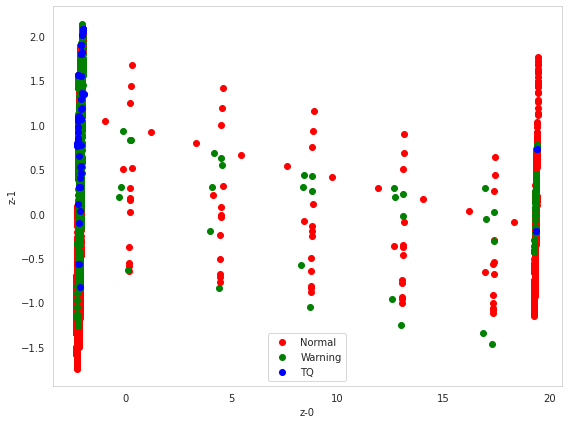

In [100]:
indice_disrupt = np.where(analysis_2022['label'] == 'TQ')
indice_warning = np.where(analysis_2022['label'] == 'Warning')
indice_normal = np.where(analysis_2022['label'] == 'Normal')

fig = plt.figure(figsize = (8,6))
ax = fig.add_subplot()
    
ax.scatter(encoded[indice_normal,0], encoded[indice_normal,1], c = 'r', label = 'Normal')
ax.scatter(encoded[indice_warning,0], encoded[indice_warning,1], c = 'g', label = 'Warning')
ax.scatter(encoded[indice_disrupt,0], encoded[indice_disrupt,1], c = 'b', label = 'TQ')
ax.set_xlabel('z-0')
ax.set_ylabel('z-1')
ax.legend()
fig.tight_layout()

<AxesSubplot:xlabel='\\q95', ylabel='\\betan'>

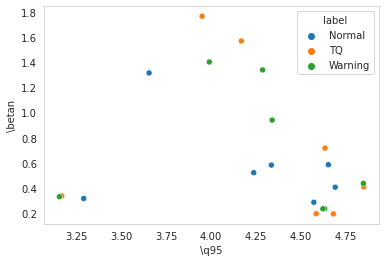

In [97]:
sns.scatterplot(x = '\\q95', y = '\\betan', data = analysis_2022[['shot','label']+cols_efit].groupby(['shot','label']).mean(), hue = 'label')

<AxesSubplot:xlabel='\\q95', ylabel='Probability'>

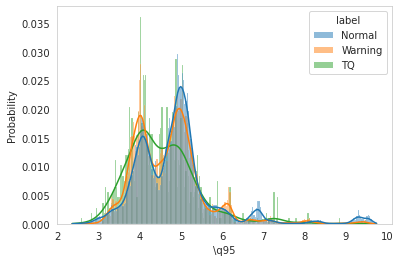

In [67]:
sns.histplot(data = analysis_2022, x = '\\q95', hue = 'label', kde = True, stat = 'probability', common_norm=False)

<AxesSubplot:xlabel='\\betan', ylabel='Probability'>

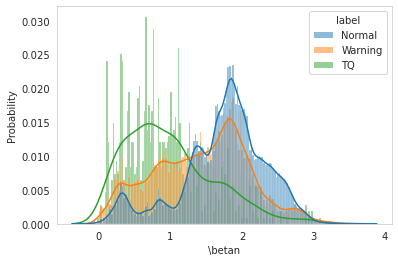

In [68]:
sns.histplot(data = analysis_2022, x = '\\betan', hue = 'label', kde = True, stat = 'probability', common_norm=False)